<a href="https://colab.research.google.com/github/itinasharma/MachineLearning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt # This line is added to import the pyplot module from matplotlib

In [25]:
df = pd.read_csv("/content/sample_data/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


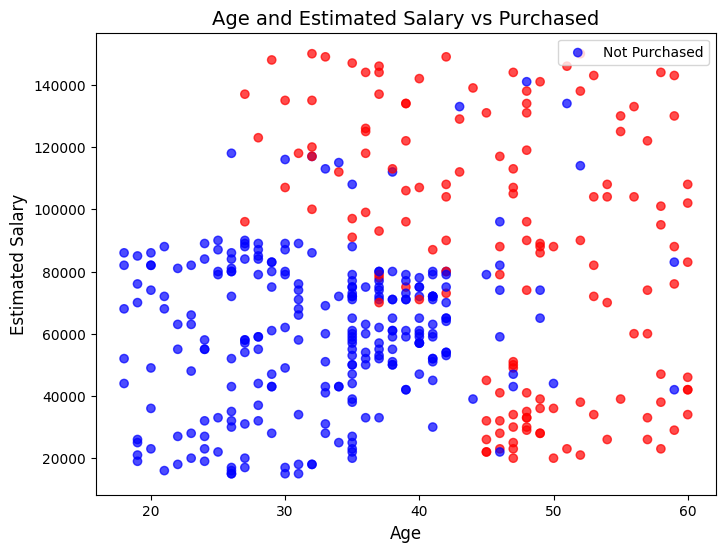

In [10]:
plt.figure(figsize=(8, 6))
colors = ['red' if purchased == 1 else 'blue' for purchased in df['Purchased']]
plt.scatter(df['Age'], df['EstimatedSalary'], c=colors, alpha=0.7)
plt.title('Age and Estimated Salary vs Purchased', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Estimated Salary', fontsize=12)
plt.legend(['Not Purchased', 'Purchased'], loc='upper right')
plt.show()

In [26]:
# Encode 'Gender' (x1) as a binary variable (0 for Male, 1 for Female)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features (x1: Gender, x2: Age, x3: Salary) and target (y: Purchased)
X = df[['Gender', 'Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scale the features (Age and EstimatedSalary need scaling; Gender is binary)
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])  # Only scale Age and Salary
X_test[:, 1:] = scaler.transform(X_test[:, 1:])


In [27]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Inspect coefficients and intercept
print("Model Coefficients (m):", model.coef_)
print("Model Intercept (b):", model.intercept_)


Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        68
           1       0.88      0.69      0.77        32

    accuracy                           0.87       100
   macro avg       0.87      0.82      0.84       100
weighted avg       0.87      0.87      0.87       100

Model Coefficients (m): [[0.10354701 2.1148451  0.83345204]]
Model Intercept (b): [-0.75892496]


In [28]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))


In [29]:
# Define the prediction function for manual predictions
def prediction_function(gender, age, salary):
    # Scale only age and salary (since gender is already binary)
    scaled_features = scaler.transform([[age, salary]])
    age_scaled = scaled_features[0][0]
    salary_scaled = scaled_features[0][1]

    # Apply logistic regression formula: z = m1*gender + m2*age + m3*salary + b
    z = model.coef_[0, 0] * gender + model.coef_[0, 1] * age_scaled + model.coef_[0, 2] * salary_scaled + model.intercept_

    return sigmoid(z)


In [32]:
# Test your function with sample inputs
gender_test, age_test, salary_test = 1, 32, 150000  # Female, 32 years old, salary $150K

prob = prediction_function(gender_test, age_test, salary_test)

print(f"Manual Probability Prediction for Gender={gender_test}, Age={age_test}, Salary={salary_test}: {prob}")
print(f"Prediction: {'Buy' if prob > 0.5 else 'Not Buy'}")


Manual Probability Prediction for Gender=1, Age=32, Salary=150000: 0.5011715215733691
Prediction: Buy


<ipython-input-28-567fd27c1b35>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


In [34]:
# Test your function with sample inputs
gender_test, age_test, salary_test = 0, 32, 120000  # Male, 32 years old, salary $120K

prob = prediction_function(gender_test, age_test, salary_test)

print(f"Manual Probability Prediction for Gender={gender_test}, Age={age_test}, Salary={salary_test}: {prob}")
print(f"Prediction: {'Buy' if prob > 0.5 else 'Not Buy'}")


Manual Probability Prediction for Gender=0, Age=32, Salary=120000: 0.3049591551598788
Prediction: Not Buy


<ipython-input-28-567fd27c1b35>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
